# Workbook 00 - Solving beams with `PyNite`

In [1]:
from PyNite import FEModel3D
from PyNite.Visualization import render_model

# Task 01

Create a `FEModel3D` object to analyze the following beam, where the green loads represent dead load and the orange load represents live load:

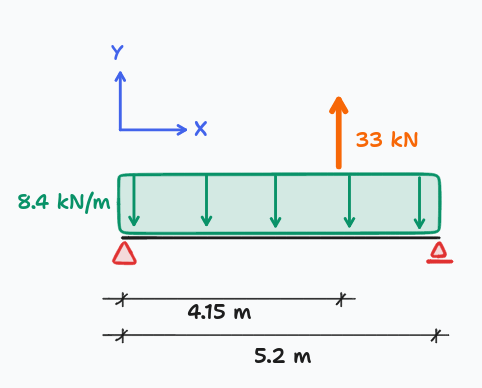

The beam is to have the following attributes:

```
E = 23000 MPa
Iz = 400e6 MPa
```

* Use `print()` to print the reactions
* Plot the shear diagram
* PLot the moment diagram

## Task 01 Response

+----------------+
| Statics Check: |
+----------------+

+------------------+--------+--------+-----------+--------+--------+--------+--------+---------+--------+---------+-----------+---------+
| Load Combination | Sum FX | Sum RX |   Sum FY  | Sum RY | Sum FZ | Sum RZ | Sum MX | Sum RMX | Sum MY | Sum RMY |   Sum MZ  | Sum RMZ |
+------------------+--------+--------+-----------+--------+--------+--------+--------+---------+--------+---------+-----------+---------+
|       LC1        |   0    |  nan   | -6.12e+04 |  nan   |   0    |  nan   |   0    |   nan   |   0    |   nan   | -1.59e+08 |   nan   |
|       LC2        |   0    |  nan   |  -5.1e+03 |  nan   |   0    |  nan   |   0    |   nan   |   0    |   nan   |  6.35e+07 |   nan   |
+------------------+--------+--------+-----------+--------+--------+--------+--------+---------+--------+---------+-----------+---------+



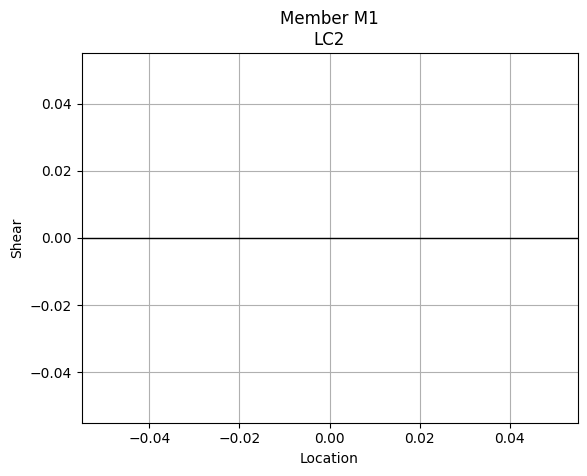

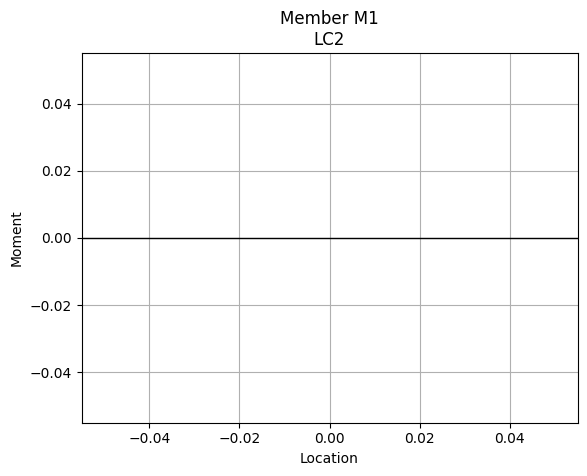

{'LC1': nan, 'LC2': nan}
{'LC1': nan, 'LC2': nan}


In [21]:
# This is me completing the workbook
beam_model = FEModel3D() # Creates an empty model

beam_model.add_node(name="node1", X=0, Y=0, Z=0) # Change the model by adding nodes
beam_model.add_node("node2", 5200, 0, 0)

beam_model.add_member(name="M1", i_node="node1", j_node="node2", E=23e3, G=77e3, Iy=22e6, Iz=400e6, J=33e3, A=2500)
pin_support_l=[True, True, True, True, False, False] # try to make the definition of a pin once and apply to all nodes
beam_model.def_support("node1",pin_support_l)
beam_model.def_support("node2",pin_support_l)

# beam_model.def_support("node1", support_DX=True, support_DY=True, support_DZ=True, support_RX=True, support_RY=False, support_RZ=False)
# beam_model.def_support("node2", False, True, True, False, False, False)

# Define Load Combo 1 - dead load only - see NBCC 2020 - Table 4.1.3.2-A 
DL_only_LC={"D": 1.4}

# Define Load Combo 2 - live and dead load only (no companion action) - see NBCC 2020 - Table 4.1.3.2-A 
LL_LC={"D": 1.25, "L":1.5}

# beam_model.add_load_combo(DL_only_LC)
beam_model.add_load_combo("LC1",DL_only_LC)
beam_model.add_load_combo("LC2", LL_LC)

beam_model.add_member_dist_load(Member="M1", Direction="Fy", w1=-8.4, w2=-8.4, x1=0, x2=5200, case="D")
# beam_model.add_member_dist_load("M1", "Fy", w1=-7.8, w2=-7.8, x1=0, x2=12000, case="L")
# beam_model.add_member_dist_load("M1", "Fy", w1=-13.0, w2=-13.0, x1=12000, x2=15000, case="L")

beam_model.add_member_pt_load(Member="M1", Direction="Fy", P=33000, x=4150, case="L")

beam_model.analyze(check_statics=True) # Changes the model by performing the analysis and adding analysis results

beam_model.Members['M1'].plot_shear(Direction="Fy", combo_name="LC2", n_points=100)
beam_model.Members['M1'].plot_moment(Direction="Mz", combo_name="LC2", n_points=100)

print(beam_model.Nodes['node1'].RxnFY)
print(beam_model.Nodes['node2'].RxnFY)

# render_model(beam_model, combo_name='LC2', annotation_size=500)


# Task 02

Create a `FEModel3D` object to analyze a beam with the following attributes:
* 3.6 m long
* 45 MPa concrete, 300x600 dp beam
* Fixed support @:
    * 0 m  
* Loads as follows:
    * UDL of self-weight
    * UDL of 60 kN/m Live load
    * Point load of 175 kN @ 2.2 m Live load
    
1. Use `print()` to print the reactions
2. Plot the shear and moment diagrams
3. Plot the deflection

Note: You will need to calculate the E and I of the beam. You can use whatever code calculations you like but remember you need to keep your force/distance/stress units consistent across all inputs in order for the results to make sense.

## Task 02 Response

# Task 03

**Option A:** If you are from the US and want to try using US units:

Create a `FEModel3D` object to analyze a beam with the following attributes:
* 168 inches long
* E and Iz are 58e3 ksi and 1200 ${in^4}$, respectively
* Vertical supports @:
    * 24 inches, 96 inches, 132  inches
* Loads as follows:
    * Point load: 5 kips, @ 48 inches
    * Uniform distributed load: 60 lbs/inch starting @ 12 inches, ending @ 120 inches
    
    
**Option B:** If you are from pretty much anywhere else:

Create a `FEModel3D` object to analyze a beam with the following attributes:
* 4200 mm long
* E and Iz are 200e3 ksi and 854e6 ${mm^4}$, respectively
* Vertical supports @:
    * 600 mm, 2440 mm, 3350 mm
* Loads as follows:
    * Point load: 25 kN, @ 1200 inches
    * Uniform distributed load: 2.4 kN starting at 300 mm, ending @ 3000 mm
    
1. Use `print()` to print the reactions
2. Plot the shear and moment diagrams
3. Plot the deflection

## Task 03 Response

# 🧳 Submit Workbook 00!

We will use this procedure for submitting all Workbooks in this course. This one is going to be the "practice" submission.

[Log in to Eduflow](https://app.eduflow.com/login) and, in your PfSE course, see the **Workbook 00 Submission** instructions.